In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import diff,dsolve,simplify,Function,I,Equality

In [2]:
a = Function('a')
b = Function('b')
ada = Function('ada')
bdb = Function('bdb')
adb = Function('adb')
# 定义参数
omega = sp.Symbol('omega',real=True,positive=True)
omegaL = sp.Symbol('omega_L',real=True,positive=True)
Epsilon = sp.Symbol('Epsilon',real=True,positive=True)
kappa_a,kappa_b = sp.symbols('kappa_a,kappa_b',real=True,positive=True)
Gamma,Gamma_a,Gamma_b = sp.symbols('Gamma,Gamma_a,Gamma_b',real=True,positive=True)
Lambda_a,Lambda_b = sp.symbols("Lambda_a,Lambda_b",real=True,positive=True)
p_a,p_b = sp.symbols('p_a,p_b',real=True,positive=True)
mu = sp.Symbol('mu',real=False)
J = sp.Symbol('J',real=False)
t = sp.Symbol('t',real=True)

In [3]:
# ===================================基础符号赋值==================================
omega_val = 1
omegaL_val= omega_val
Gamma_val = 0.01*omega_val
kappa_a_val = 0.1*omega_val
kappa_b_val = 0.003*omega_val
J_val = Gamma_val/2
Epsilon_val = 0.1*omega_val
# 正常非互易条件下的符号赋值
Lambda_a_val = kappa_a_val+Gamma_val
Lambda_b_val = kappa_b_val+Gamma_val
mu_val = I
# 最优非互易条件下的符号赋值
opnr_xi_val = sp.sqrt(kappa_a_val/kappa_b_val)
opnr_Gamma_a_val = opnr_xi_val*Gamma_val
opnr_Gamma_b_val = Gamma_val / opnr_xi_val
opnr_Lambda_a_val = kappa_a_val+opnr_Gamma_a_val
opnr_Lambda_b_val = kappa_b_val+opnr_Gamma_b_val

In [4]:
#======================================   替换函数  ================================
# 非互易 最优 条件的替换
def subs_opnrmy(para):
    para = para.subs({
       Lambda_a:opnr_Lambda_a_val,Lambda_b:opnr_Lambda_b_val,\
       Epsilon:Epsilon_val,omega:omega_val,omegaL:omegaL_val,\
       mu:mu_val,Gamma:Gamma_val,J:J_val
    })
    return para
# 非互易 正常 条件下的替换
def subs_nrmy(para):
    para = para.subs({
        Lambda_a:Lambda_a_val,Lambda_b:Lambda_b_val,Gamma:Gamma_val,\
        Epsilon:Epsilon_val,omega:omega_val,omegaL:omegaL_val,\
        mu:mu_val,J:J_val
    })
    return para
# 互易条件下的替换
def subs_rmy(para):
    para = para.subs({
        kappa_a:kappa_a_val,kappa_b:kappa_b_val,\
        omega:omega_val,omegaL:omegaL_val,\
        Epsilon:Epsilon_val,J:J_val
    })
    return para

In [5]:
# =========================================== 非互易正常条件下的方程组 ==================
nr_eq1 = Equality(diff(a(t),t,1),-(Lambda_a/2+I*omega)*a(t)-I*Epsilon*sp.exp(-I*omegaL*t))
nr_eq2 = Equality(diff(b(t),t,1),-(Lambda_b/2+I*omega)*b(t)+sp.conjugate(mu)*Gamma*a(t))
# 开始进行替换
nr_eq1 = subs_nrmy(nr_eq1)
nr_eq2 = subs_nrmy(nr_eq2)
# 求解微分方程组
rab = dsolve([nr_eq1,nr_eq2],ics={a(0):0,b(0):0})
ra = rab[0].rhs
rb = rab[1].rhs
nr_rbdb = sp.conjugate(rb)*rb

In [6]:
# ========================================== 非互易最优条件下的方程组 ===================
opnr_eq1 = Equality(diff(a(t),t,1),-(Lambda_a/2+I*omega)*a(t)-I*Epsilon*sp.exp(-I*omegaL*t))
opnr_eq2 = Equality(diff(b(t),t,1),-(Lambda_b/2+I*omega)*b(t)+sp.conjugate(mu)*Gamma*a(t))
# 替换
opnr_eq1 = subs_opnrmy(opnr_eq1)
opnr_eq2 = subs_opnrmy(opnr_eq2)
# 求解微分方程
rab = dsolve([opnr_eq1,opnr_eq2],ics={a(0):0,b(0):0})
ra = rab[0].rhs
rb = rab[1].rhs
opnr_rbdb = sp.conjugate(rb)*rb

In [7]:
# ========================================= 互易条件下的微分方程组 ========================
r_eq1 = Equality(diff(a(t),t,1),-(kappa_a/2+I*omega)*a(t)-I*J*b(t)-I*Epsilon*sp.exp(-I*omegaL*t))
r_eq2 = Equality(diff(b(t),t,1),-(kappa_b/2+I*omega)*b(t)-I*sp.conjugate(J)*a(t))
# 替换
r_eq1 = subs_rmy(r_eq1)
r_eq2 = subs_rmy(r_eq2)
# 求解微分方程组
rab = dsolve([r_eq1,r_eq2],ics={a(0):0,b(0):0})
ra = rab[0].rhs
rb = rab[1].rhs
r_rbdb = sp.conjugate(rb)*rb

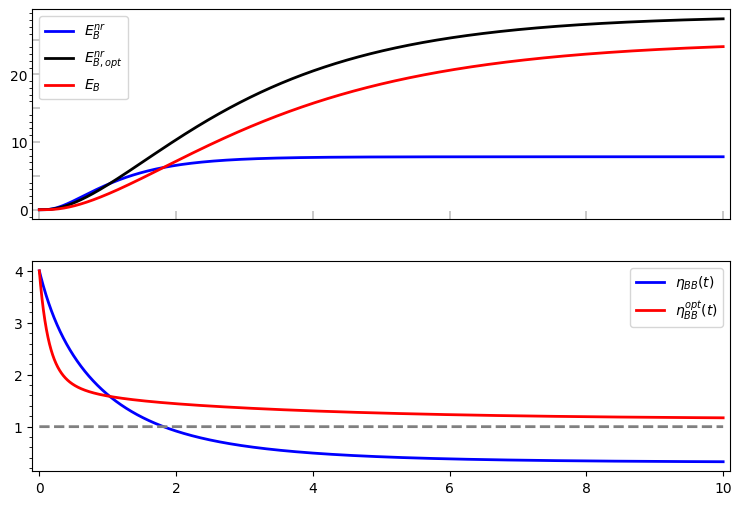

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter

ymajorLocator1 = MultipleLocator(5)
yminorLocator1 = MultipleLocator(1)
ymajorLocator2 = MultipleLocator(1)
yminorLocator2 = MultipleLocator(0.2)



tlist = np.linspace(0.001,2000,8000)
nr_rbdbf = sp.lambdify(t,nr_rbdb,'numpy')
opnr_rbdbf = sp.lambdify(t,opnr_rbdb,'numpy')
r_rbdbf = sp.lambdify(t,r_rbdb,'numpy')
nr_r = np.real(nr_rbdbf(tlist))
opnr_r = np.real(opnr_rbdbf(tlist))
r_r = np.real(r_rbdbf(tlist))
fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(9,6))
ax[0].plot(J_val*tlist,nr_r,'b',label=r"$E_{B}^{nr}$",linewidth=2)
ax[0].plot(J_val*tlist,opnr_r,'k',label=r'$E_{B,opt}^{nr}$',linewidth=2)
ax[0].plot(J_val*tlist,r_r,'r',label=r'$E_B$',linewidth=2)
ax[0].set_xticks([0,2,4,6,8,10],['0','2','4','6','8','10'])
ax[0].set_yticks([0,10,20],['0','10','20'])
ax[0].tick_params(direction='in', length=6, width=0.3,grid_alpha=0.5)
ax[0].yaxis.set_major_locator(ymajorLocator1)
ax[0].yaxis.set_minor_locator(yminorLocator1)
ax[0].legend()
ax[1].plot(J_val*tlist,nr_r/r_r,'b',label=r'$\eta_{BB}(t)$',linewidth=2)
ax[1].plot(J_val*tlist,opnr_r / r_r,'r',label=r'$\eta_{BB}^{opt}(t)$',linewidth=2)
ax[1].plot(J_val*tlist,np.ones_like(tlist),linestyle='--',color='gray',linewidth=2)
ax[1].set_yticks([1,2,3,4],['1','2','3','4'])
ax[1].yaxis.set_major_locator(ymajorLocator2)
ax[1].yaxis.set_minor_locator(yminorLocator2)
ax[1].set_xlim([-0.1,10.1])
ax[1].legend()
plt.show()